<a href="https://colab.research.google.com/github/internetian/Data-Factory/blob/master/World_wide_Covid_19_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import io
from matplotlib import font_manager #, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

In [0]:
from google.colab import files
uploaded=files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv
Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv
Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global.csv


In [0]:
confirmed=pd.read_csv(io.StringIO(uploaded['time_series_covid19_confirmed_global.csv'].decode('utf-8')))
deaths=pd.read_csv(io.StringIO(uploaded['time_series_covid19_deaths_global.csv'].decode('utf-8')))
recovered=pd.read_csv(io.StringIO(uploaded['time_series_covid19_recovered_global.csv'].decode('utf-8')))


In [0]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70


In [0]:
def trans_df(x):   #원본 데이터프레임을 시계열 데이터프레임으로 변환하는 함수
    g=x.groupby(['Country/Region']).sum()
    r=g.transpose()
    r1=r.drop(['Lat','Long'])
    r2=r1.astype(float)
    r2=r2.reset_index()    #일자를 인덱스에서 열로 바꿈
    r2['index']=pd.to_datetime(r2['index'])
    r2=r2.set_index(['index'])
    return r2

c8=trans_df(confirmed)
d8=trans_df(deaths)
r8=trans_df(recovered)


# 국가별로 데이터프레임 합치는 함수(confirmed,deaths,recovered)
def mix_df_country(a):
    total_df=pd.DataFrame(columns=['date','Country/Region','confirmed','deaths','recovered'])
    total_df['date']=c8.index.tolist()
    total_df['Country/Region']=a
    total_df['confirmed']=c8[a].tolist()
    total_df['deaths']=d8[a].tolist()
    total_df['recovered']=r8[a].tolist()
    return total_df

def concat_df(list_):     #리스트 형태로 국가를 입력하면 데이터프레임으로 결합해줌
    total_df=pd.DataFrame()
    for i in list_:
        k=mix_df_country(i)
        total_df=pd.concat([total_df,k],axis=0,ignore_index=True)
    return total_df

In [0]:
country_list=['Korea, South','Burma','Indonesia','Singapore','Qatar','Kuwait','United Arab Emirates','Vietnam','Algeria','Chile','Venezuela','Panama']
ttl_df=concat_df(country_list) #상기 국가 데이터프레임 합치기 


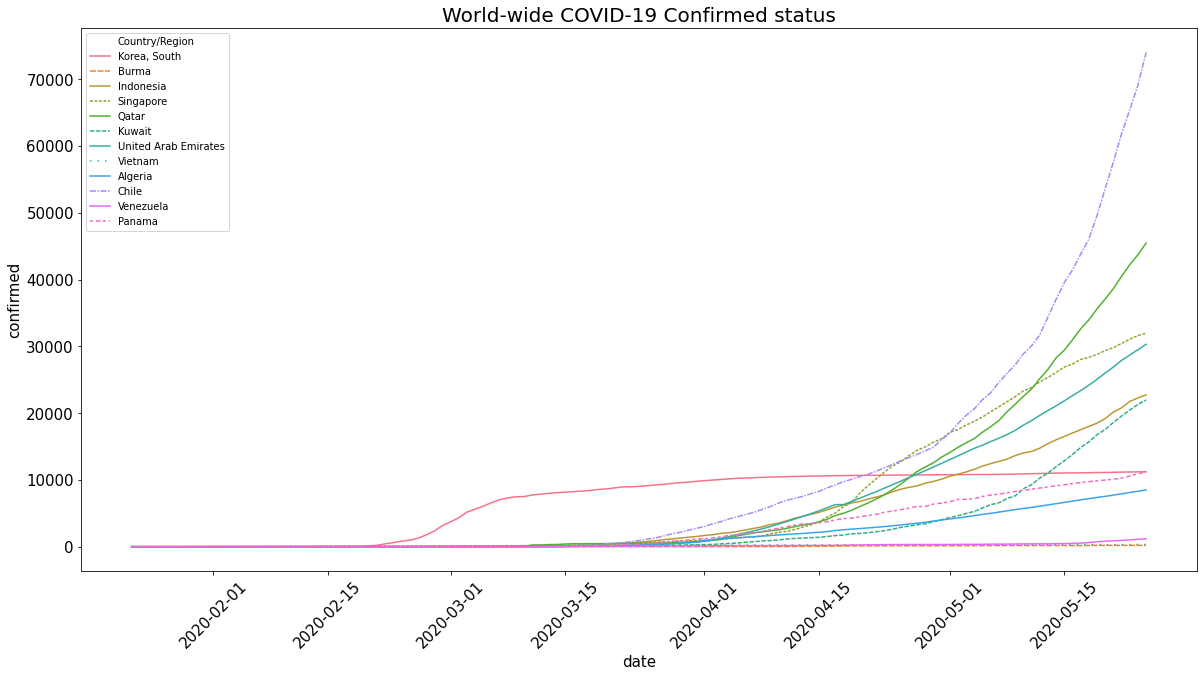

In [0]:
#진출국 확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

In [0]:
ttl_df['net_confirmed']=ttl_df['confirmed']-ttl_df['recovered']-ttl_df['deaths'] #순확진자수 구하기
ttl_df['survival_rate']=ttl_df['recovered']/ttl_df['confirmed'] #확진시 완치율 구하기
ttl_df['death_rate']=ttl_df['deaths']/ttl_df['confirmed']  #확진시 사망율 구하기


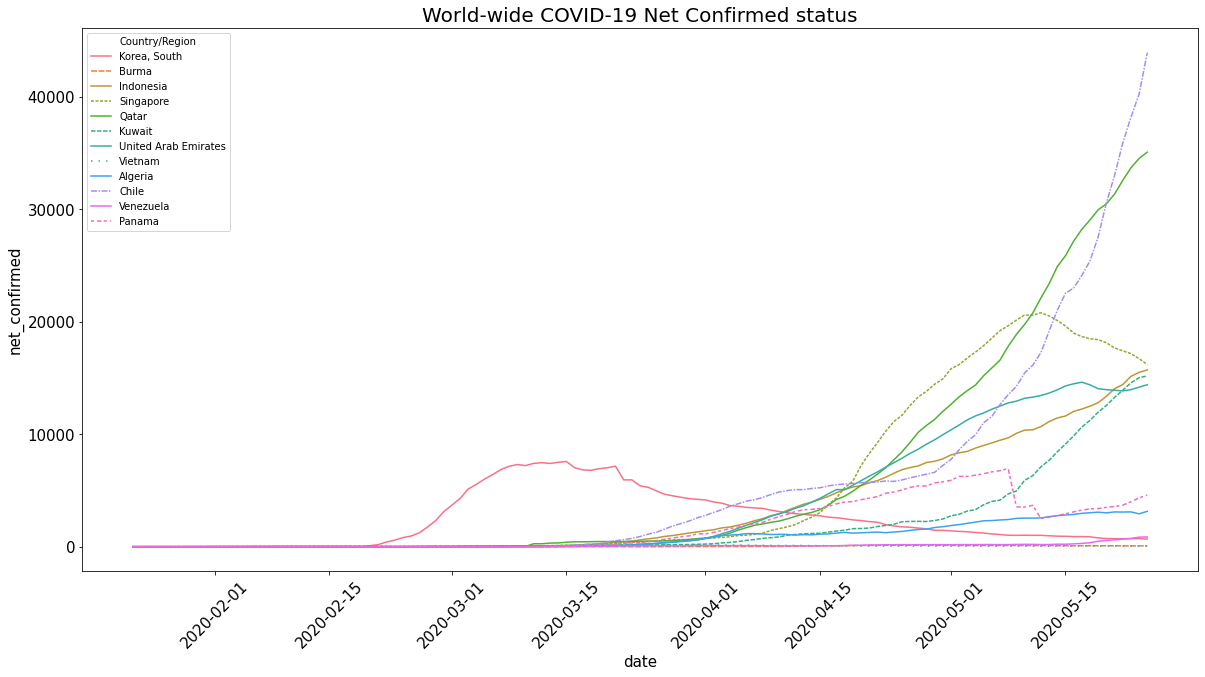

In [0]:
#진출국 순확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Net Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='net_confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

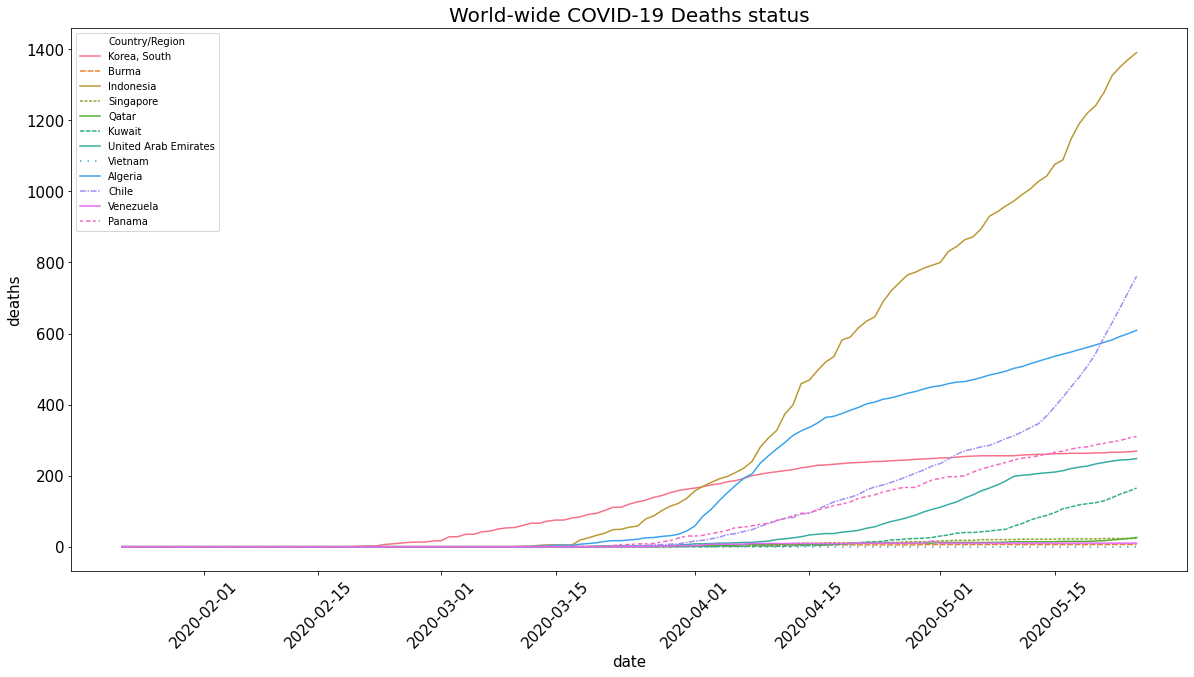

In [0]:
#진출국 사망자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Deaths status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='deaths',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

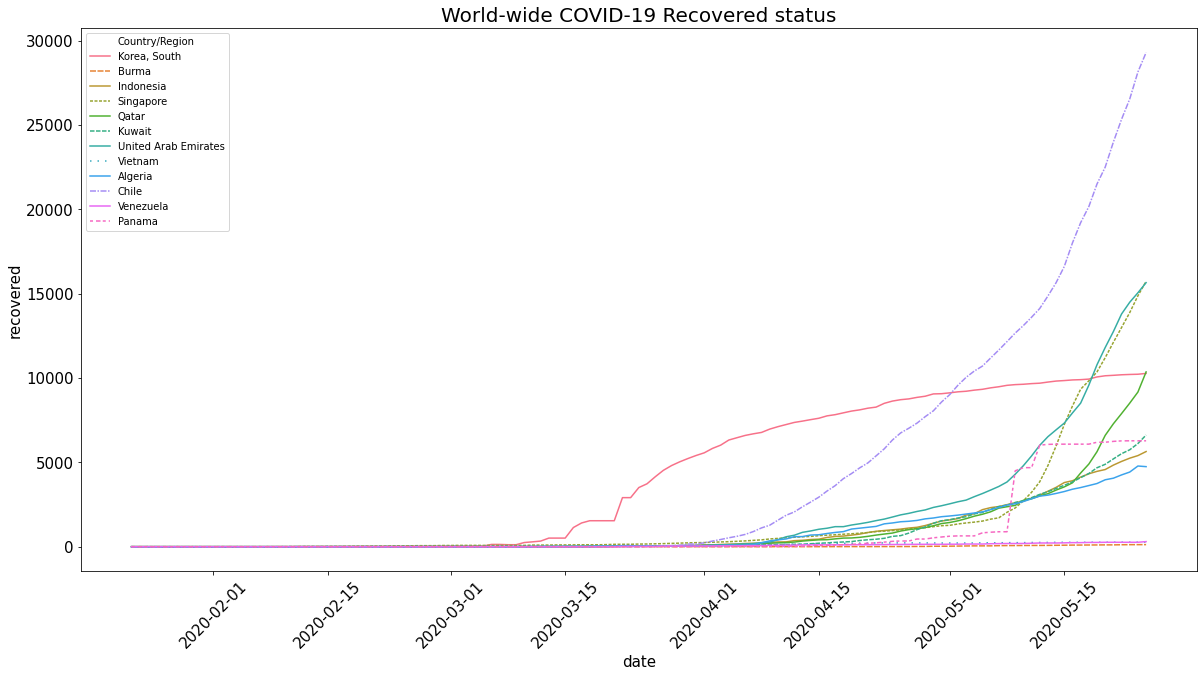

In [0]:
#진출국 완치자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Recovered status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='recovered',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

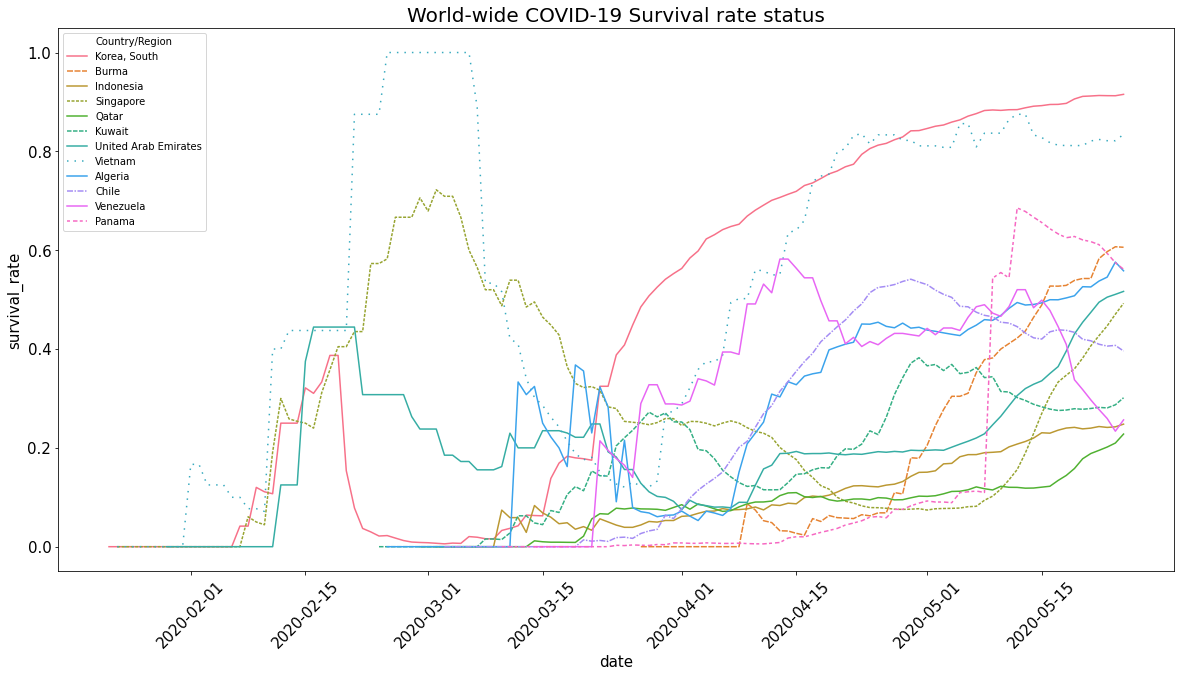

In [0]:
#진출국 완치율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Survival rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='survival_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

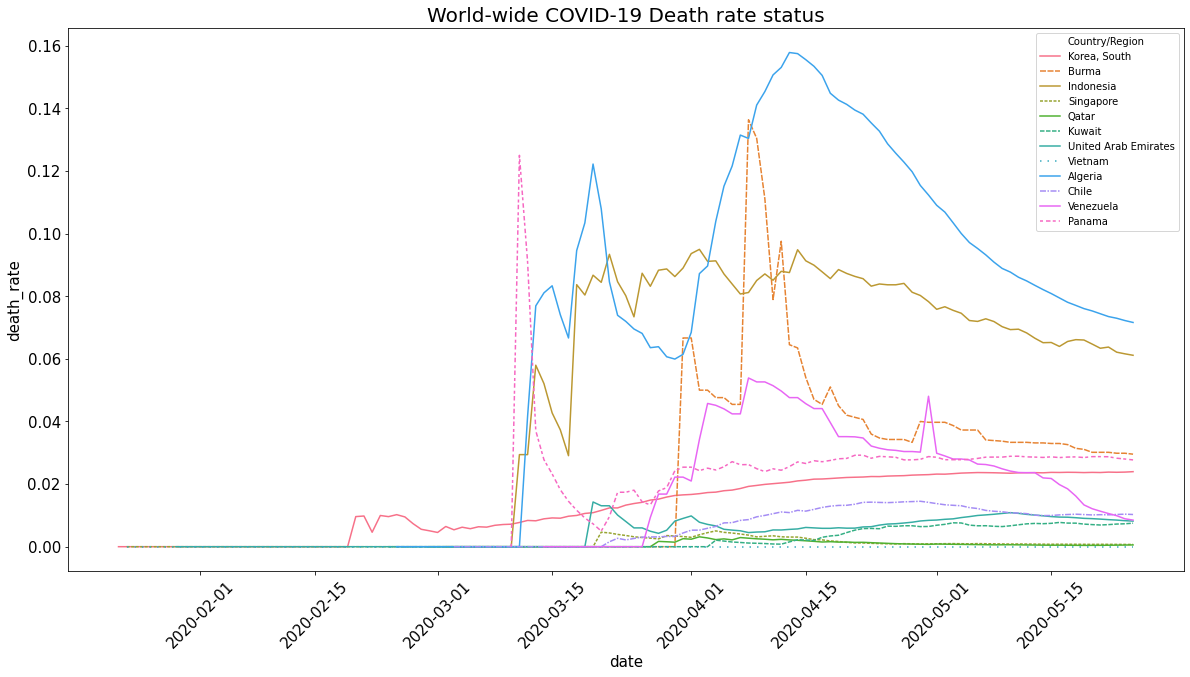

In [0]:
#진출국 사망율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Death rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='death_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

In [0]:
from fbprophet import Prophet